In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

# Set the Seaborn style to whitegrid
sns.set(style='whitegrid')

# Load the datasets (ensure paths are updated to where your files are located)
files = {
    'A2C': 'C:/_source/pesbiu2.0/A2C.xlsx',
    'DDDQN': 'C:/_source/pesbiu2.0/DDDQN.xlsx',
    'DQN': 'C:/_source/pesbiu2.0/DQN.xlsx',
    'Fallback_DDDQN': 'C:/_source/pesbiu2.0/FallDDDQN.xlsx',
    'Hybrid': 'C:/_source/pesbiu2.0/hybrid.xlsx',
    'Static': 'C:/_source/pesbiu2.0/static.xlsx',
    'Threshold': 'C:/_source/pesbiu2.0/treshold.xlsx',
}
# Define a custom color palette for all algorithms
color_palette = {
    'A2C': '#ff7f0e',
    'DDDQN': '#1f77b4',
    'DQN': '#9467bd',
    'Fallback_DDDQN': '#8c564b',
    'Hybrid': '#2ca02c',
    'Static': '#d62728',
    'Threshold': '#FFEE58'
}
# Read each file into a DataFrame
energy_savings = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
    'Site': []
})
latency_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Latency_Before': [],
    'Avg_Latency_After': [],
    'Site': []
})
throughput_data = pd.DataFrame({
    'Algorithm': [],
    'Avg_Throughput_Before': [],
    'Avg_Throughput_After': [],
    'Site': []
})
overall_metrics = pd.DataFrame({
    'Algorithm': [],
    'Avg_Energy_Saving': [],
    'Avg_Latency_After': [],
    'Avg_Throughput_After': [],
    'Site': []
})



In [2]:
# Extract energy saving, latency, and throughput data from each dataset and add it to combined DataFrames
for algorithm, file_path in files.items():
    df = pd.read_excel(file_path)
    if 'Avg_Energy_Saving' in df.columns and 'Site' in df.columns:
        energy_saving_data = df[['Avg_Energy_Saving', 'Site']].copy()
        energy_saving_data['Algorithm'] = algorithm
        energy_savings = pd.concat([energy_savings, energy_saving_data], ignore_index=True)
    
    if 'Avg_Latency_Before' in df.columns and 'Avg_Latency_After' in df.columns and 'Site' in df.columns:
        latency_data_temp = df[['Avg_Latency_Before', 'Avg_Latency_After', 'Site']].copy()
        latency_data_temp['Algorithm'] = algorithm
        latency_data = pd.concat([latency_data, latency_data_temp], ignore_index=True)
    
    if 'Avg_Throughput_Before' in df.columns and 'Avg_Throughput_After' in df.columns and 'Site' in df.columns:
        throughput_data_temp = df[['Avg_Throughput_Before', 'Avg_Throughput_After', 'Site']].copy()
        throughput_data_temp['Algorithm'] = algorithm
        throughput_data = pd.concat([throughput_data, throughput_data_temp], ignore_index=True)
    
    if 'Avg_Energy_Saving' in df.columns and 'Avg_Latency_After' in df.columns and 'Avg_Throughput_After' in df.columns and 'Site' in df.columns:
        avg_metrics = df[['Site', 'Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After']].copy()
        avg_metrics['Algorithm'] = algorithm
        overall_metrics = pd.concat([overall_metrics, avg_metrics], ignore_index=True)

# Set the font size for the plots
plt.rc('font', size=18)
    


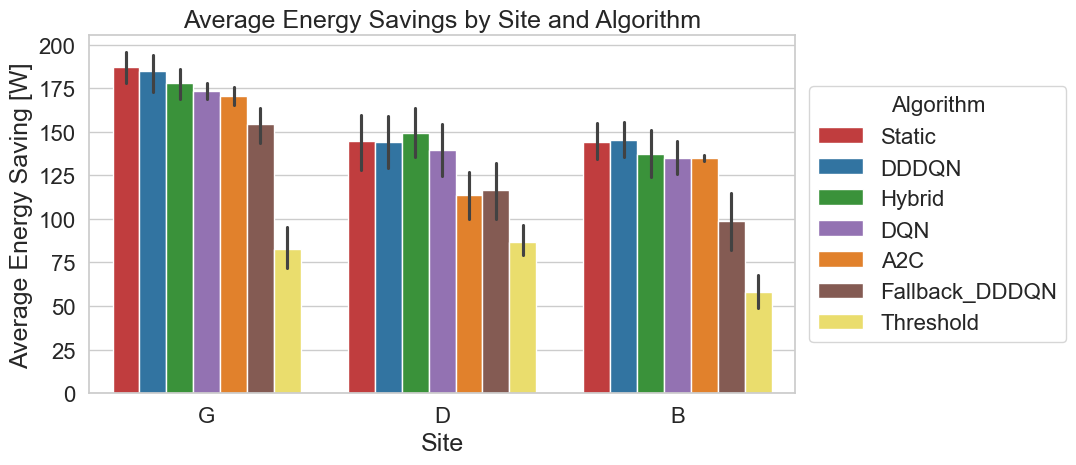

In [3]:

# Sort energy_savings DataFrame by Avg_Energy_Saving in descending order for plotting from best to worst
energy_savings = energy_savings.sort_values(by='Avg_Energy_Saving', ascending=False)

# Plotting Energy Savings by Site and Algorithm
plt.figure(figsize=(12, 5))
sns.barplot(data=energy_savings, x='Site', y='Avg_Energy_Saving', hue='Algorithm', palette=color_palette, order=energy_savings['Site'].unique())
plt.title('Average Energy Savings by Site and Algorithm', fontsize=18)
plt.xlabel('Site', fontsize=18)
plt.ylabel('Average Energy Saving [W]', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Algorithm', fontsize=16, title_fontsize=16, loc='center right', bbox_to_anchor=(1.4, 0.5))
plt.tight_layout()
plt.show()

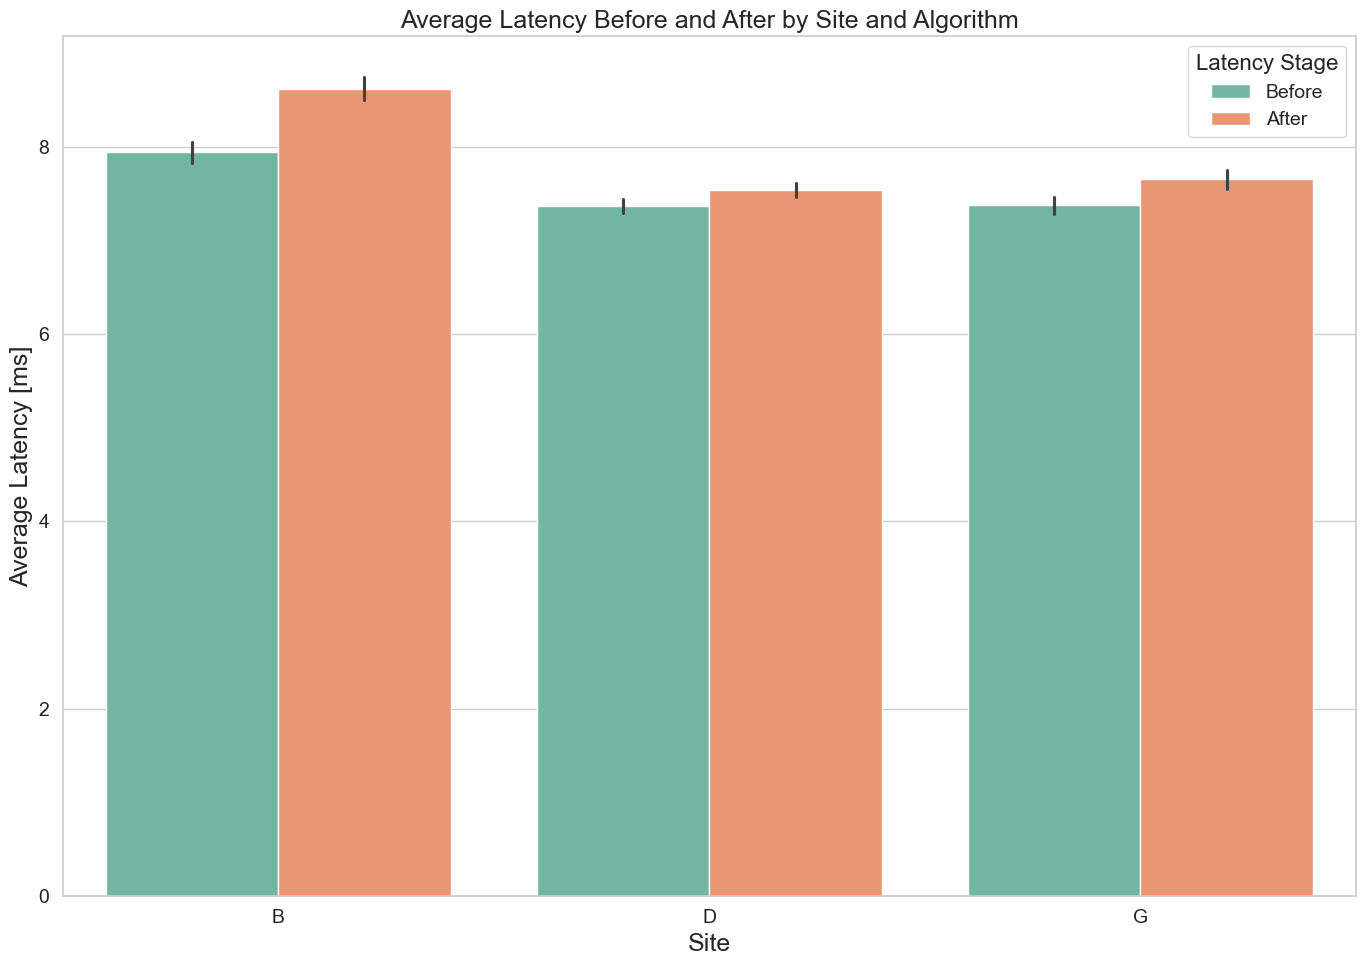

In [5]:
# Melt latency_data for plotting purposes
latency_data_melted = pd.melt(latency_data, id_vars=['Algorithm', 'Site'], value_vars=['Avg_Latency_Before', 'Avg_Latency_After'],
                              var_name='Latency Stage', value_name='Latency')
latency_data_melted['Latency Stage'] = latency_data_melted['Latency Stage'].replace({'Avg_Latency_Before': 'Before', 'Avg_Latency_After': 'After'})

# Plotting Latency Impact by Site and Algorithm (with separation by Algorithm and Latency Stage)
plt.figure(figsize=(14, 10))
sns.barplot(data=latency_data_melted, x='Site', y='Latency', hue='Latency Stage', palette='Set2', dodge=True)
plt.title('Average Latency Before and After by Site and Algorithm', fontsize=18)
plt.xlabel('Site', fontsize=18)
plt.ylabel('Average Latency [ms]', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Latency Stage', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\xkolac15\AppData\Local\Temp\ipykernel_5160\4037412609.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_sorted, x='Algorithm', y='Efficiency_Score', palette=algorithm_colors)


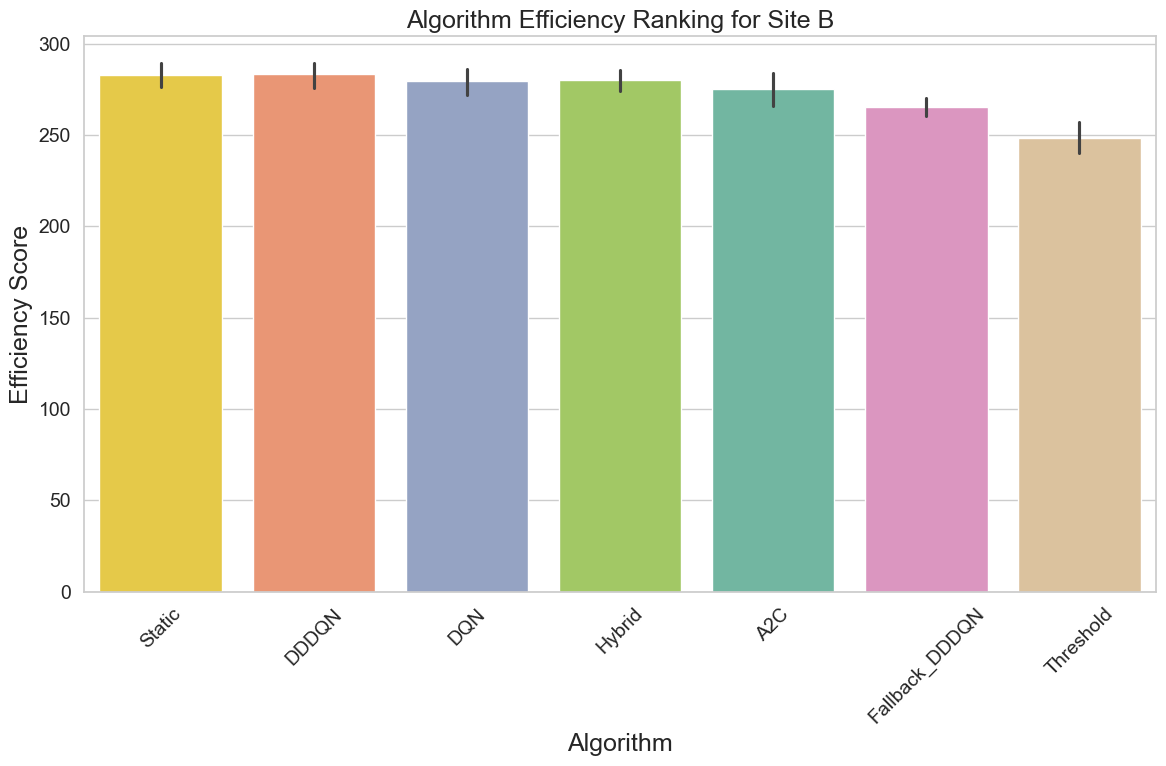

C:\Users\xkolac15\AppData\Local\Temp\ipykernel_5160\4037412609.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_sorted, x='Algorithm', y='Efficiency_Score', palette=algorithm_colors)


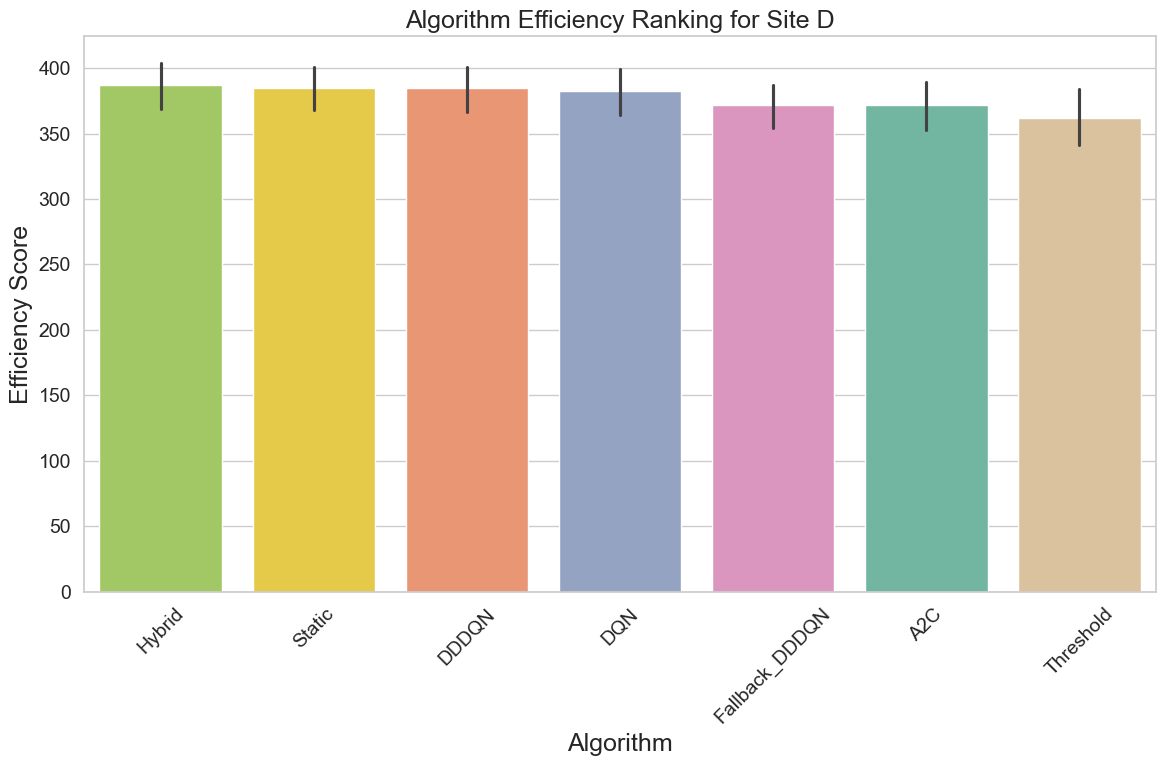

C:\Users\xkolac15\AppData\Local\Temp\ipykernel_5160\4037412609.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_sorted, x='Algorithm', y='Efficiency_Score', palette=algorithm_colors)


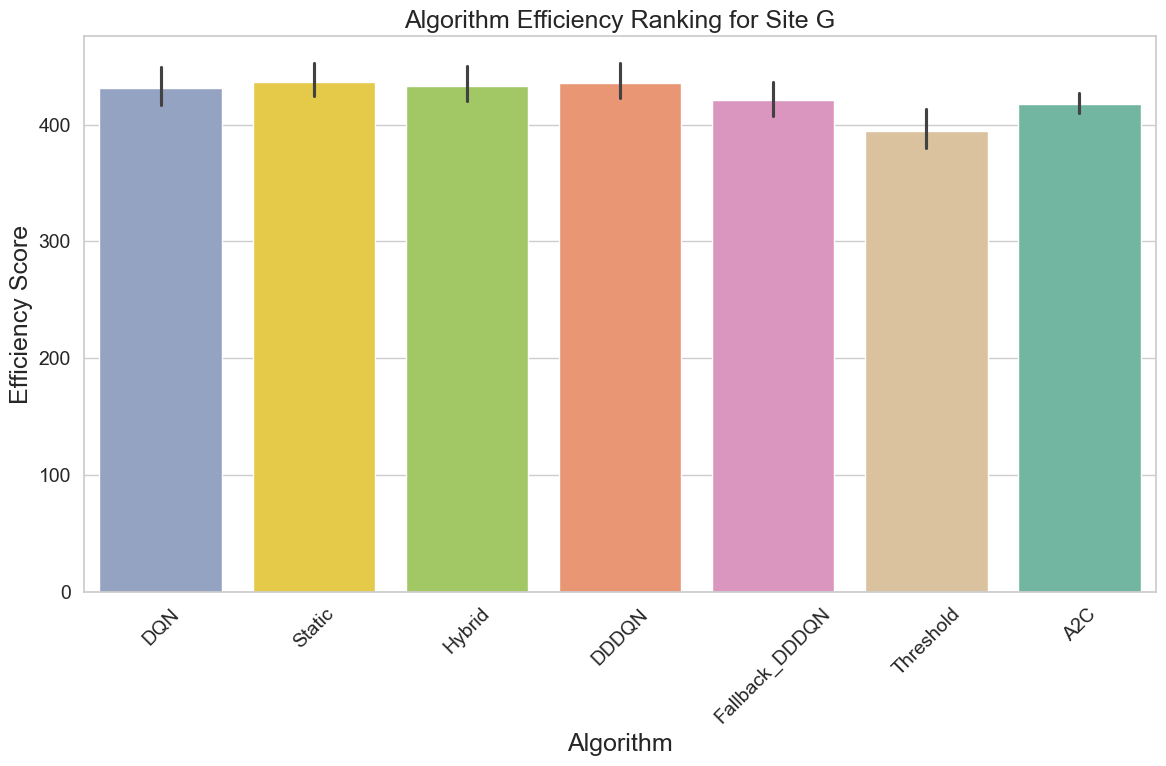

In [6]:
# Calculate Efficiency Score for each site separately
site_groups = overall_metrics.groupby('Site')

# Define color palette for algorithms
palette = sns.color_palette('Set2')
algorithm_colors = dict(zip(overall_metrics['Algorithm'].unique(), palette))

efficiency_scores = []
for site, group in site_groups:
    group['Efficiency_Score'] = (
        group['Avg_Energy_Saving'] * 0.4 + 
        (1 / (group['Avg_Latency_After'] + 1e-5)) * 0.3 + 
        group['Avg_Throughput_After'] * 0.3
    )
    efficiency_scores.append(group)

overall_metrics_with_scores = pd.concat(efficiency_scores, ignore_index=True)

# Plot Efficiency Score for each site
for site, group in overall_metrics_with_scores.groupby('Site'):
    group_sorted = group.sort_values(by='Efficiency_Score', ascending=False).reset_index(drop=True)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=group_sorted, x='Algorithm', y='Efficiency_Score', palette=algorithm_colors)
    plt.title(f'Algorithm Efficiency Ranking for Site {site}', fontsize=18)
    plt.xlabel('Algorithm', fontsize=18)
    plt.ylabel('Efficiency Score', fontsize=18)
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()

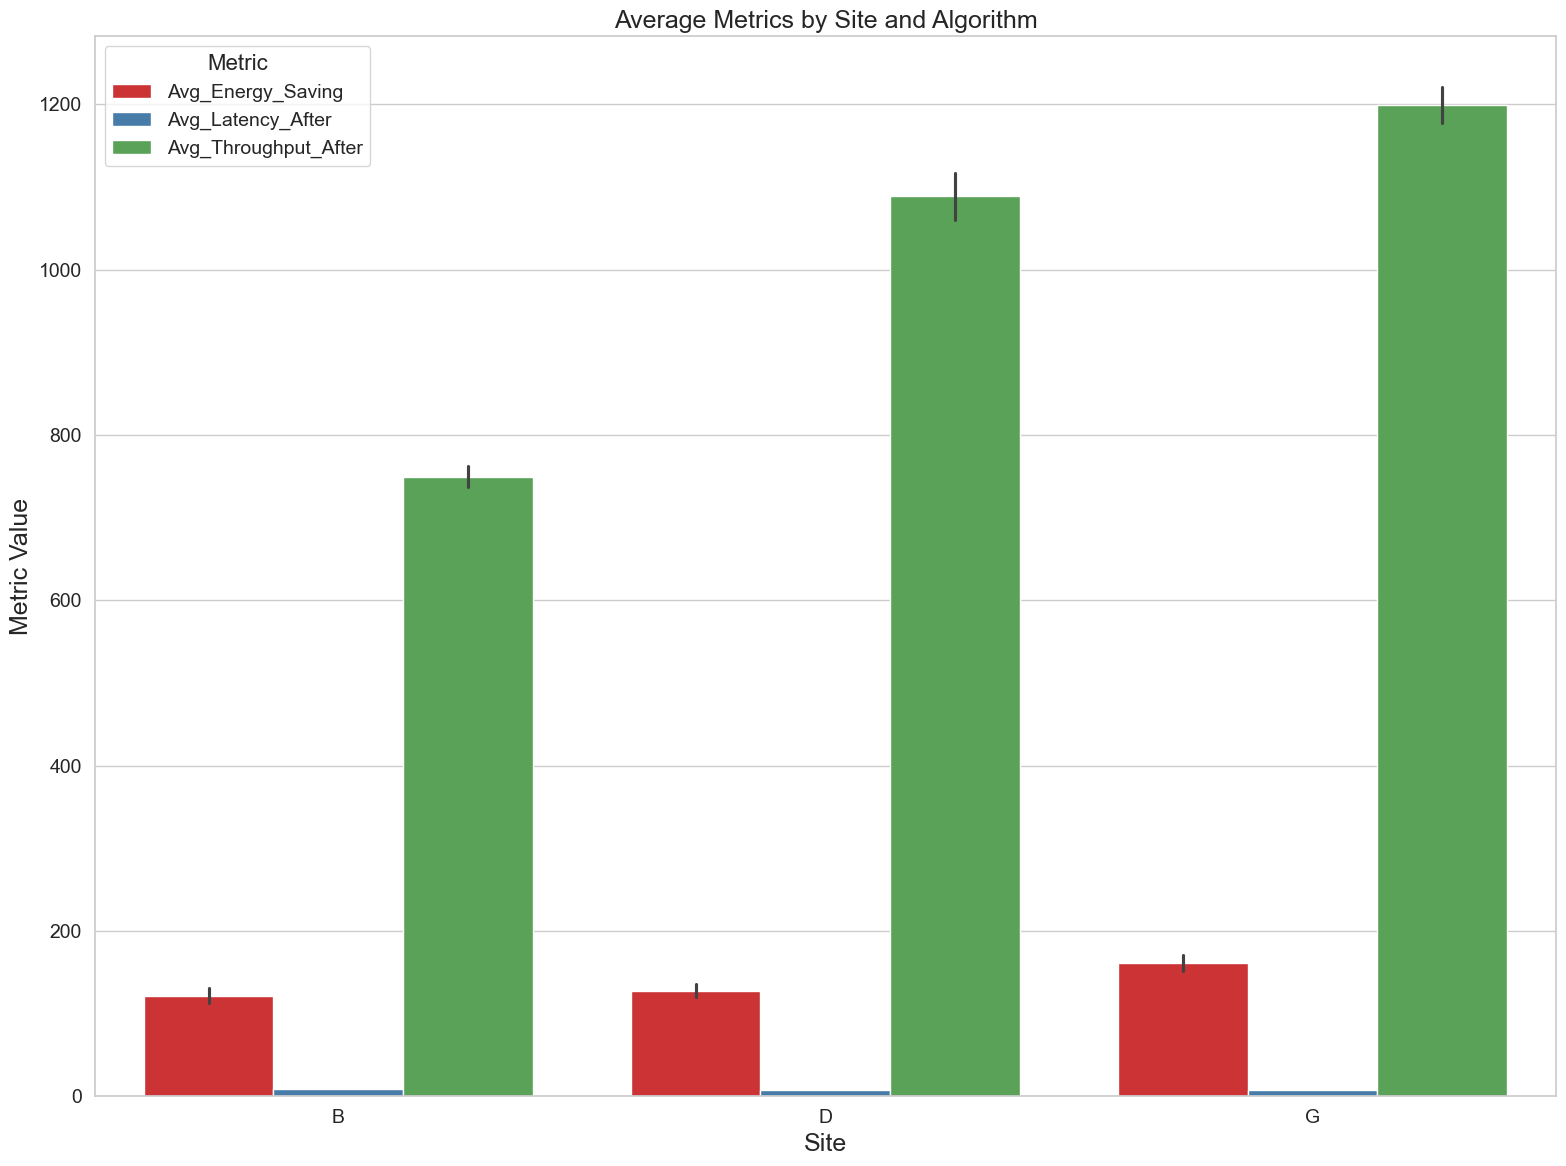

In [7]:
# Plotting Average Metrics by Site and Algorithm
overall_metrics_melted = overall_metrics.melt(id_vars=['Algorithm', 'Site'], value_vars=['Avg_Energy_Saving', 'Avg_Latency_After', 'Avg_Throughput_After'], var_name='Metric', value_name='Value')
overall_metrics_melted = overall_metrics_melted.sort_values(by=['Site', 'Metric', 'Value'], ascending=[True, True, False])

plt.figure(figsize=(16, 12))
sns.barplot(data=overall_metrics_melted, x='Site', y='Value', hue='Metric', dodge=True, palette='Set1', order=overall_metrics_melted['Site'].unique())
plt.title('Average Metrics by Site and Algorithm', fontsize=18)
plt.xlabel('Site', fontsize=18)
plt.ylabel('Metric Value', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Metric', fontsize=14, title_fontsize=16)
plt.tight_layout()
plt.show()